In [1]:
from  bped2.pedigree import Pedigree
import bped2.view as pview

In [2]:
ped = Pedigree()
ped.load('../data/ped/famRh.ped')


In [3]:
f = 0.05
bn1 = pview.ped_to_bn(ped,0.05)

In [4]:
evidence = pview.load_evidence('../data/famRh.ev','0')
evidence

{'X1': [0.0, 1.0, 1.0, 1.0],
 'X2': [1.0, 0.0, 0.0, 0.0],
 'X3': [0.0, 1.0, 1.0, 1.0],
 'X4': [0.0, 1.0, 1.0, 1.0],
 'X5': [0.0, 1.0, 1.0, 1.0],
 'X6': [0.0, 1.0, 1.0, 1.0],
 'X7': [1.0, 0.0, 0.0, 0.0],
 'X8': [0.0, 1.0, 1.0, 1.0],
 'X9': [1.0, 0.0, 0.0, 0.0]}

In [5]:
ie1 = pview.gum.LazyPropagation(bn1)
ie1.setEvidence(evidence)
ie1.makeInference()

In [6]:
ie2 = pview.gum.LazyPropagation(bn1)
ie2.setEvidence(evidence)
ie2.makeInference()

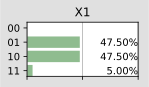

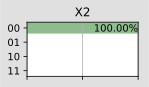

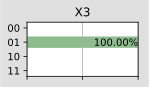

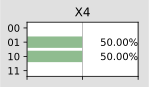

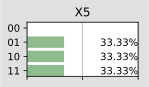

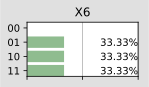

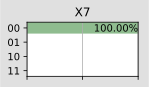

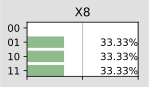

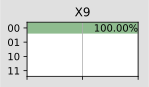

In [7]:
for i in ped.get_pedigree().keys():
    pview.gnb.showProba(ie1.posterior(f"X{i}"))

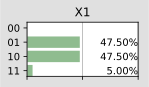

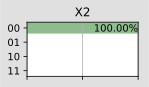

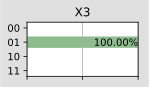

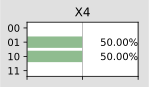

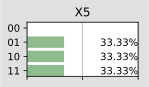

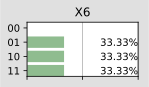

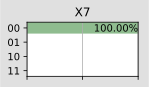

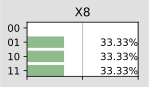

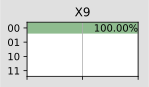

In [8]:
for i in ped.get_pedigree().keys():
    pview.gnb.showProba(ie2.posterior(f"X{i}"))


In [9]:
pview.load_evidence_out('../data/famRh.out','0')

{'X1': [0.0, 0.495, 0.495, 0.01],
 'X2': [1.0, 0.0, 0.0, 0.0],
 'X3': [0.0, 1.0, 0.0, 0.0],
 'X4': [0.0, 0.5, 0.5, 0.0],
 'X5': [0.0, 0.333333, 0.333333, 0.333333],
 'X6': [0.0, 0.333333, 0.333333, 0.333333],
 'X7': [1.0, 0.0, 0.0, 0.0],
 'X8': [0.0, 0.333333, 0.333333, 0.333333],
 'X9': [1.0, 0.0, 0.0, 0.0]}

# Comparating

In [10]:
ped = Pedigree()
ped.load('../cplex/samples/pedigree_50_7_4_4_G8.ped')
bn_no = pview.ped_to_bn(ped,0.05)



In [11]:
new_evidence = {'X20' : [1, 0, 1, 0],'X30' : [1, 0, 0, 0],
'X40' : [1, 1, 1, 0]}
new_evidence

{'X20': [1, 0, 1, 0], 'X30': [1, 0, 0, 0], 'X40': [1, 1, 1, 0]}

In [12]:
ie3 = pview.gum.LazyPropagation(bn_no)
ie3.setEvidence(new_evidence)
ie3.makeInference()

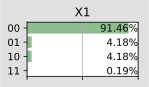

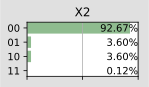

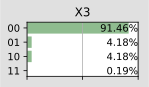

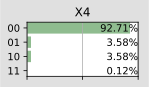

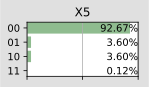

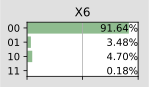

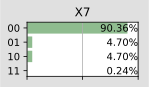

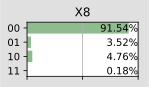

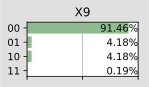

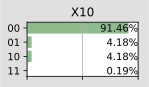

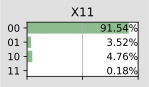

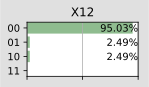

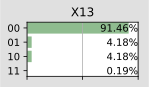

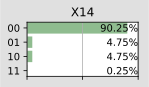

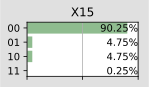

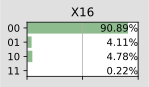

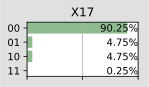

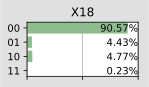

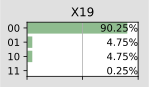

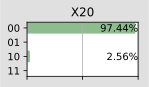

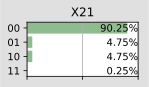

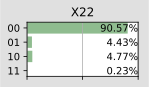

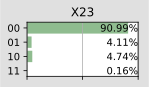

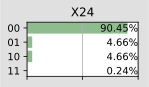

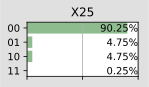

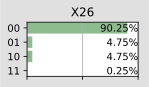

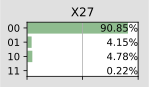

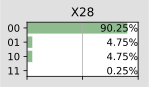

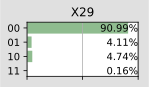

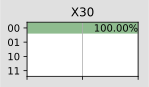

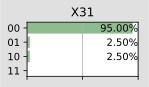

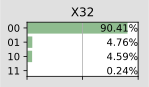

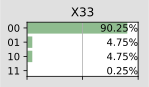

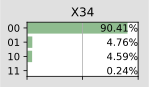

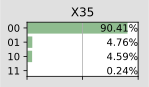

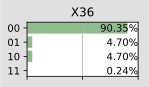

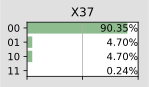

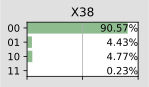

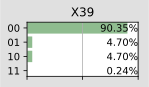

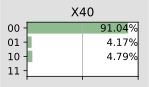

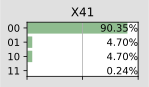

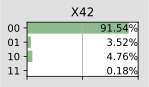

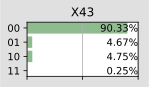

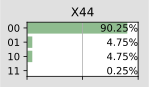

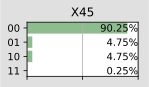

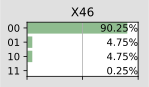

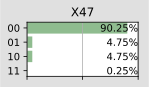

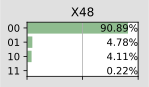

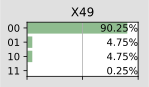

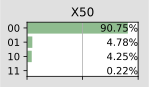

In [13]:
for i in ped.get_pedigree().keys():
    pview.gnb.showProba(ie3.posterior(f"X{i}"))


In [14]:
bn_compact = pview.ped_to_bn_compact(ped,0.05)
ie4 = pview.gum.LazyPropagation(bn_no)
ie4.setEvidence(new_evidence)
ie4.makeInference()

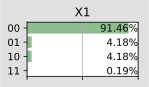

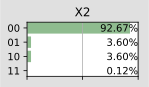

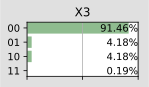

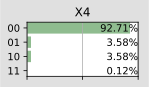

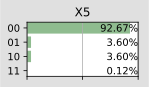

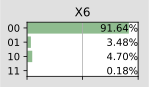

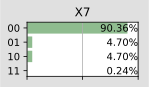

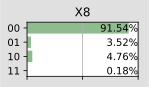

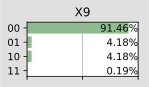

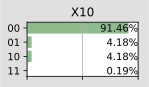

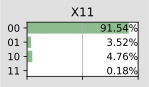

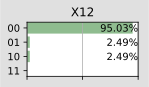

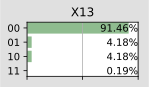

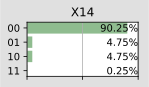

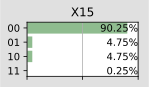

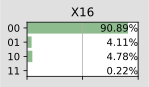

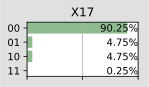

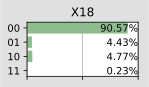

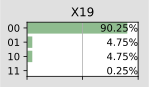

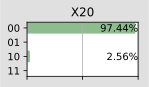

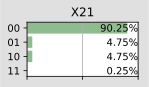

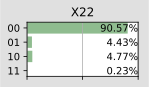

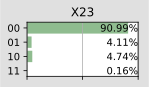

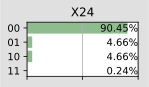

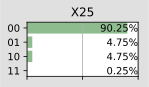

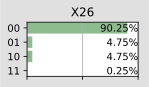

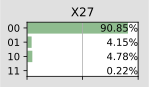

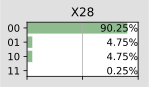

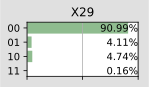

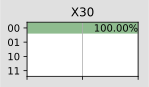

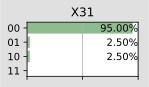

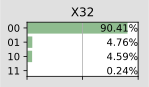

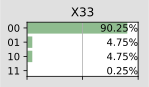

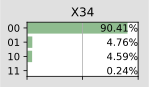

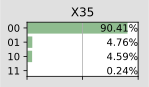

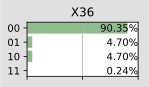

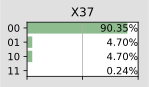

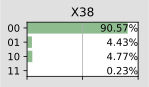

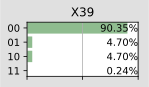

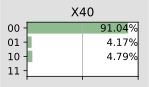

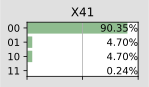

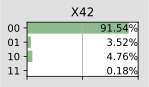

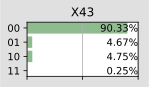

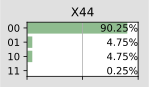

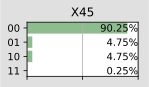

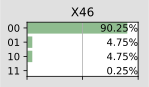

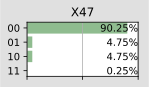

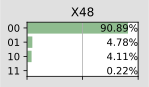

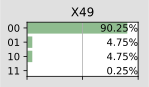

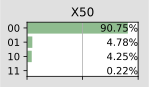

In [15]:
for i in ped.get_pedigree().keys():
    pview.gnb.showProba(ie4.posterior(f"X{i}"))

In [16]:
pview.gum.ExactBNdistance(bn_no,bn_compact)

OperationNotAllowed: [pyAgrum] Operation not allowed: BNdistance : the 2 BNs are not compatible (not the same vars : Sfat2)